**Stroke Mangement**

Link To Dataset:https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

**BIL PROJECT REPORT**

**Problem Statement** :- Based on studies of more than 56 million deaths in 2001, it was found that 7.1 million cases were due to heart disease and 5.4 million were also due to stroke. This indicates that stroke – after heart disease – is the second major cause of death in the world that is nearly 10% of all deaths reported. With regard to these findings and emphasis on prediction of stroke incidence to reduce complications, disabilities and healthcare costs, this study was aimed to investigate 50 risk factors for brain stroke. Owing to the human need of knowledge and increasing data volume, technique development for automated extraction of knowledge from these data is inevitable.




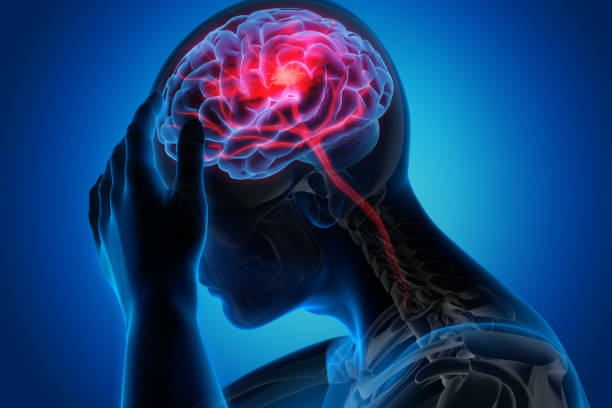

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit,cross_val_score
from sklearn import metrics
import warnings
from sklearn.ensemble import RandomForestClassifier 
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


{'healthcare-dataset-stroke-data.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\n9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1\n51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1\n31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1\n60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1\n1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1\n56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1\n53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1\n10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1\n27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1\n60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1\n12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1\n12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1\n12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1\n8213,Mal

In [ ]:
raw_data=pd.read_csv("healthcare-dataset-stroke-data.csv" )

In [ ]:
raw_data

id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
raw_data.describe()

id          age  ...          bmi       stroke
count   5110.000000  5110.000000  ...  4909.000000  5110.000000
mean   36517.829354    43.226614  ...    28.893237     0.048728
std    21161.721625    22.612647  ...     7.854067     0.215320
min       67.000000     0.080000  ...    10.300000     0.000000
25%    17741.250000    25.000000  ...    23.500000     0.000000
50%    36932.000000    45.000000  ...    28.100000     0.000000
75%    54682.000000    61.000000  ...    33.100000     0.000000
max    72940.000000    82.000000  ...    97.600000     1.000000

[8 rows x 7 columns]

In [ ]:
raw_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
raw_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
raw_data['bmi'].fillna(raw_data['bmi'].mean(), inplace=True)
raw_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
raw_data.drop(raw_data[raw_data['gender'] == 'Other'].index, inplace=True)

In [ ]:
age_interval = ['Teenager','Adult','Middleage','Elderly','Old']
age_bin = [0,20,40,60,80,100]
age_set = pd.cut(raw_data['age'],age_bin,labels=age_interval)
age_set = pd.DataFrame(age_set)
age_set.columns = ["age_interval"]
raw_data = pd.concat([raw_data,age_set],axis=1)
raw_data

id  gender   age  ...   smoking_status  stroke age_interval
0      9046    Male  67.0  ...  formerly smoked       1      Elderly
1     51676  Female  61.0  ...     never smoked       1      Elderly
2     31112    Male  80.0  ...     never smoked       1      Elderly
3     60182  Female  49.0  ...           smokes       1    Middleage
4      1665  Female  79.0  ...     never smoked       1      Elderly
...     ...     ...   ...  ...              ...     ...          ...
5105  18234  Female  80.0  ...     never smoked       0      Elderly
5106  44873  Female  81.0  ...     never smoked       0          Old
5107  19723  Female  35.0  ...     never smoked       0        Adult
5108  37544    Male  51.0  ...  formerly smoked       0    Middleage
5109  44679  Female  44.0  ...          Unknown       0    Middleage

[5109 rows x 13 columns]

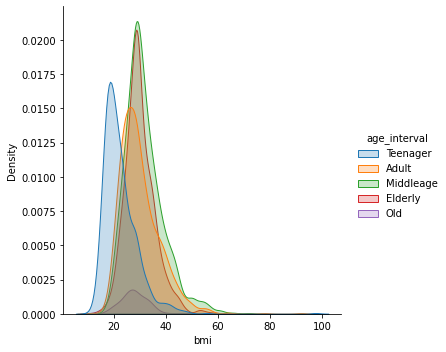

In [ ]:
sns.displot(raw_data,x="bmi",hue="age_interval",kind="kde",fill=True)

In [ ]:
Teenager_data  = pd.DataFrame()
Adult_data     = pd.DataFrame()
Middleage_data = pd.DataFrame()
Elderly_data   = pd.DataFrame()
Old_data       = pd.DataFrame()
frame_list = [Teenager_data, Adult_data, Middleage_data, Elderly_data, Old_data]

for i in range(5):
    data = raw_data[raw_data['age_interval']==age_interval[i]]['bmi'][raw_data[raw_data['age_interval']==age_interval[i]]['bmi'].notnull()]
    value = np.argmax(np.bincount(data.astype(np.int32)))
    frame_list[i] = raw_data[raw_data['age_interval']==age_interval[i]].copy()
    frame_list[i].bmi = frame_list[i].bmi.fillna(value)
frame_list[3]

id  gender   age  ...   smoking_status  stroke age_interval
0      9046    Male  67.0  ...  formerly smoked       1      Elderly
1     51676  Female  61.0  ...     never smoked       1      Elderly
2     31112    Male  80.0  ...     never smoked       1      Elderly
4      1665  Female  79.0  ...     never smoked       1      Elderly
6     53882    Male  74.0  ...     never smoked       1      Elderly
...     ...     ...   ...  ...              ...     ...          ...
5087  26214  Female  63.0  ...  formerly smoked       0      Elderly
5088  22190  Female  64.0  ...          Unknown       0      Elderly
5092  56799    Male  76.0  ...     never smoked       0      Elderly
5097  64520    Male  68.0  ...          Unknown       0      Elderly
5105  18234  Female  80.0  ...     never smoked       0      Elderly

[1188 rows x 13 columns]

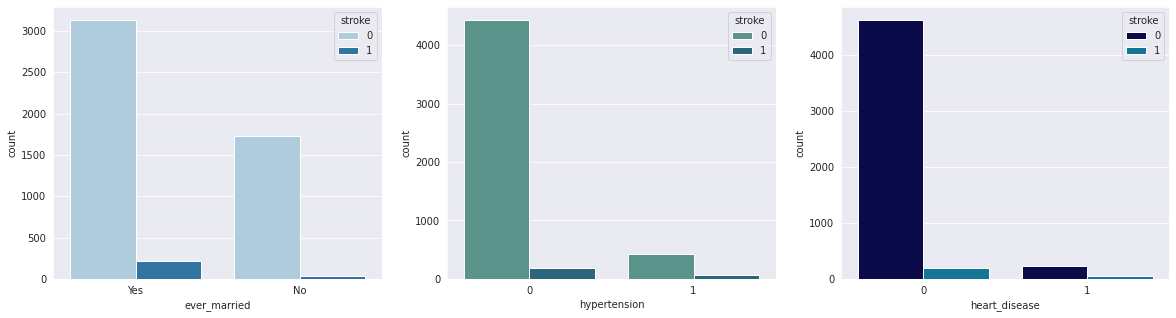

In [ ]:
plt.subplots(figsize=(20,5))
sns.set_style(style="darkgrid")

plt.subplot(1,3,1)
sns.countplot("ever_married",data=raw_data,palette="Paired",hue="stroke")

plt.subplot(1,3,2)
sns.countplot("hypertension",data=raw_data,palette="crest",hue='stroke')

plt.subplot(1,3,3)
sns.countplot("heart_disease",data=raw_data,palette="ocean",hue='stroke')

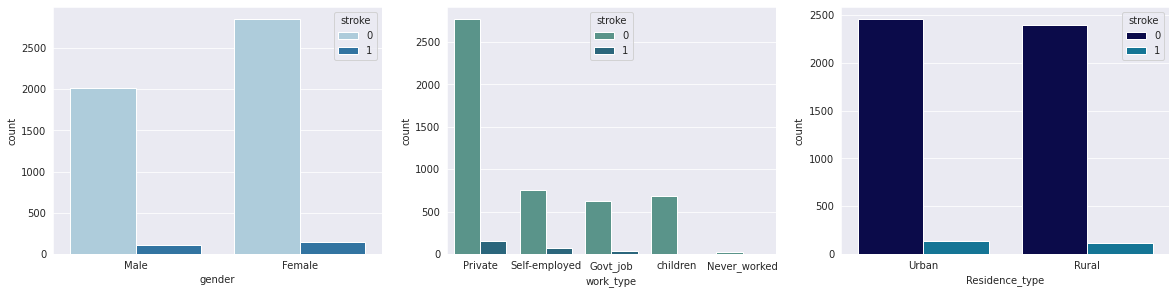

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(2,3,1)
sns.countplot("gender",data=raw_data,palette="Paired",hue='stroke')

plt.subplot(2,3,2)
sns.countplot("work_type",data=raw_data,palette="crest",hue='stroke')

plt.subplot(2,3,3)
sns.countplot("Residence_type",data=raw_data,palette="ocean",hue='stroke')

In [ ]:
data = pd.concat([frame_list[i] for i in range(5)],axis=0)
data

id  gender    age  ...   smoking_status  stroke age_interval
162   69768  Female   1.32  ...          Unknown       1     Teenager
245   49669  Female  14.00  ...          Unknown       1     Teenager
249   30669    Male   3.00  ...          Unknown       0     Teenager
251   16523  Female   8.00  ...          Unknown       0     Teenager
253   46136    Male  14.00  ...          Unknown       0     Teenager
...     ...     ...    ...  ...              ...     ...          ...
5018  19826  Female  81.00  ...  formerly smoked       0          Old
5062  11184  Female  82.00  ...     never smoked       0          Old
5071  52652    Male  81.00  ...          Unknown       0          Old
5100  68398    Male  82.00  ...     never smoked       0          Old
5106  44873  Female  81.00  ...     never smoked       0          Old

[5109 rows x 13 columns]

In [ ]:
data['gender'] = data['gender'].map({'Male': int(0),'Female':int(1)})
data['ever_married'] = data['ever_married'].map({'Yes':int(1), 'No':int(0)})
data['work_type'] = data['work_type'].map({'Private':int(3), 'Self-employed':int(4),'Govt_job':int(2), 'children':int(1), 'Never_worked':int(0)})
data['Residence_type'] = data['Residence_type'].map({'Urban':int(2), 'Rural':int(1)})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':int(1),'never smoked':int(2), 'smokes':int(3),'Unknown':int(0)})
data['age_interval'] = data['age_interval'].map({'Teenager':int(1),'Adult':int(2), 'Middleage':int(3),'Elderly':int(4),'Old':int(5)})
data

id  gender    age  ...  smoking_status  stroke  age_interval
162   69768       1   1.32  ...               0       1             1
245   49669       1  14.00  ...               0       1             1
249   30669       0   3.00  ...               0       0             1
251   16523       1   8.00  ...               0       0             1
253   46136       0  14.00  ...               0       0             1
...     ...     ...    ...  ...             ...     ...           ...
5018  19826       1  81.00  ...               1       0             5
5062  11184       1  82.00  ...               2       0             5
5071  52652       0  81.00  ...               0       0             5
5100  68398       0  82.00  ...               2       0             5
5106  44873       1  81.00  ...               2       0             5

[5109 rows x 13 columns]

In [ ]:
shuffled_data = data.sample(frac=1,random_state=4)
stroke = shuffled_data.loc[shuffled_data["stroke"] == 1]
normal = shuffled_data.loc[shuffled_data["stroke"] == 0].sample(n=249,random_state=50)
merged_data = pd.concat([stroke,normal],axis=0)
merged_data

id  gender   age  ...  smoking_status  stroke  age_interval
48    35626       0  81.0  ...               2       1             5
158   66258       1  71.0  ...               1       1             4
213   66866       1  48.0  ...               2       1             3
42    61960       0  82.0  ...               3       1             5
202    8580       1  77.0  ...               2       1             4
...     ...     ...   ...  ...             ...     ...           ...
4309  72491       0  53.0  ...               3       0             3
1089  69143       1  45.0  ...               0       0             3
3617  61651       0  48.0  ...               2       0             3
1158  41291       1  46.0  ...               2       0             3
590   56553       0  51.0  ...               0       0             3

[498 rows x 13 columns]

In [ ]:
 
 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
colorscale_1= [[1.0 , "#A50026"],[0.8888888888888888, "#D73027"],[0.7777777777777778, "#F46D43"],[0.6666666666666666, "#FDAE61"],
                [0.5555555555555556, "#FEE090"],[0.4444444444444444, "#F3F0E2"],[0.3333333333333333, "#E3FFFF"],[0.2222222222222222, "#ACE4FF"],[0.1111111111111111, "#74ADD1"],[0.0 , "#313695"]]
fig = make_subplots(rows=1, cols=1)
dataset_val = merged_data.corr('pearson')
dataset_idx = dataset_val.index
dataset_col = dataset_val.columns
dataset_val = dataset_val.values
fig.add_trace(
go.Heatmap(x=dataset_col,y=dataset_idx,z=dataset_val,name='pearson',xgap=1,ygap=1,colorscale=colorscale_1),row=1, col=1)
fig.update_layout(height=800, width=900)
fig.show()

In [ ]:
columns = ['gender','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status','age_interval']
x = merged_data[columns]
y = merged_data.iloc[:,-2]
x

gender   age  hypertension  ...   bmi  smoking_status  age_interval
48         0  81.0             0  ...  33.7               2             5
158        1  71.0             0  ...  34.1               1             4
213        1  48.0             0  ...  20.5               2             3
42         0  82.0             0  ...  26.4               3             5
202        1  77.0             0  ...  32.0               2             4
...      ...   ...           ...  ...   ...             ...           ...
4309       0  53.0             0  ...  29.2               3             3
1089       1  45.0             0  ...  36.7               0             3
3617       0  48.0             0  ...  21.9               2             3
1158       1  46.0             0  ...  29.5               2             3
590        0  51.0             0  ...  42.3               0             3

[498 rows x 8 columns]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =206)
x_train

gender    age  hypertension  ...        bmi  smoking_status  age_interval
4133       0   4.00             0  ...  17.500000               0             1
1          1  61.00             0  ...  28.893237               2             4
135        1  71.00             0  ...  38.700000               2             4
149        1  70.00             0  ...  26.100000               2             4
213        1  48.00             0  ...  20.500000               2             3
...      ...    ...           ...  ...        ...             ...           ...
177        0  78.00             1  ...  25.500000               1             4
198        0  79.00             0  ...  28.893237               1             4
4553       1  42.00             0  ...  20.100000               2             3
1918       1  68.00             0  ...  29.100000               3             4
3251       0   0.56             0  ...  20.100000               0             1

[398 rows x 8 columns]

Support Vector Machine:Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane: 

In [ ]:
from sklearn.svm import SVC
dt = SVC()
svc = SVC(kernel='rbf')
dtree=svc.fit(x_train,y_train)
y_predict = svc.predict(x_test)
a=print("SVM Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("SVM F1 score:",metrics.f1_score(y_test,y_predict))


SVM Accuracy: 0.92
SVM F1 score: 0.923076923076923


Text(0, 0.5, 'Y_Prediction')

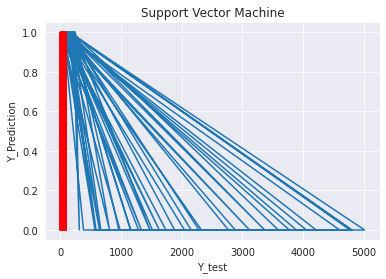

In [ ]:

plt.plot(y_test)
plt.plot(y_predict,color="red")
plt.title('Support Vector Machine')
plt.xlabel("Y_test")
plt.ylabel("Y_Prediction")



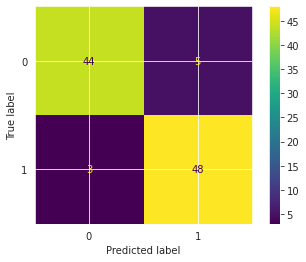

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, x_test, y_test)


Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(x_train, y_train)

score = model.score(x_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(x_train, y_train)
logistic_test = model.score(x_test, y_test)
#== 
y_pred= model.predict(x_test)
print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print(cm)


Testing Score 
 0.87
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        49
           1       0.84      0.92      0.88        51

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

[[40  9]
 [ 4 47]]


Random Forest:"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting. 

In [ ]:
rdf = RandomForestClassifier(random_state=163,bootstrap=True,max_depth=100,max_features = 'sqrt',
                              min_samples_leaf= 1, min_samples_split= 5,n_estimators= 5)
rdf.fit(x_train, y_train)
y_predict = rdf.predict(x_test)
c=print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Random Forest F1 score:",metrics.f1_score(y_test,y_predict))

Random Forest Accuracy: 0.86
Random Forest F1 score: 0.8679245283018867


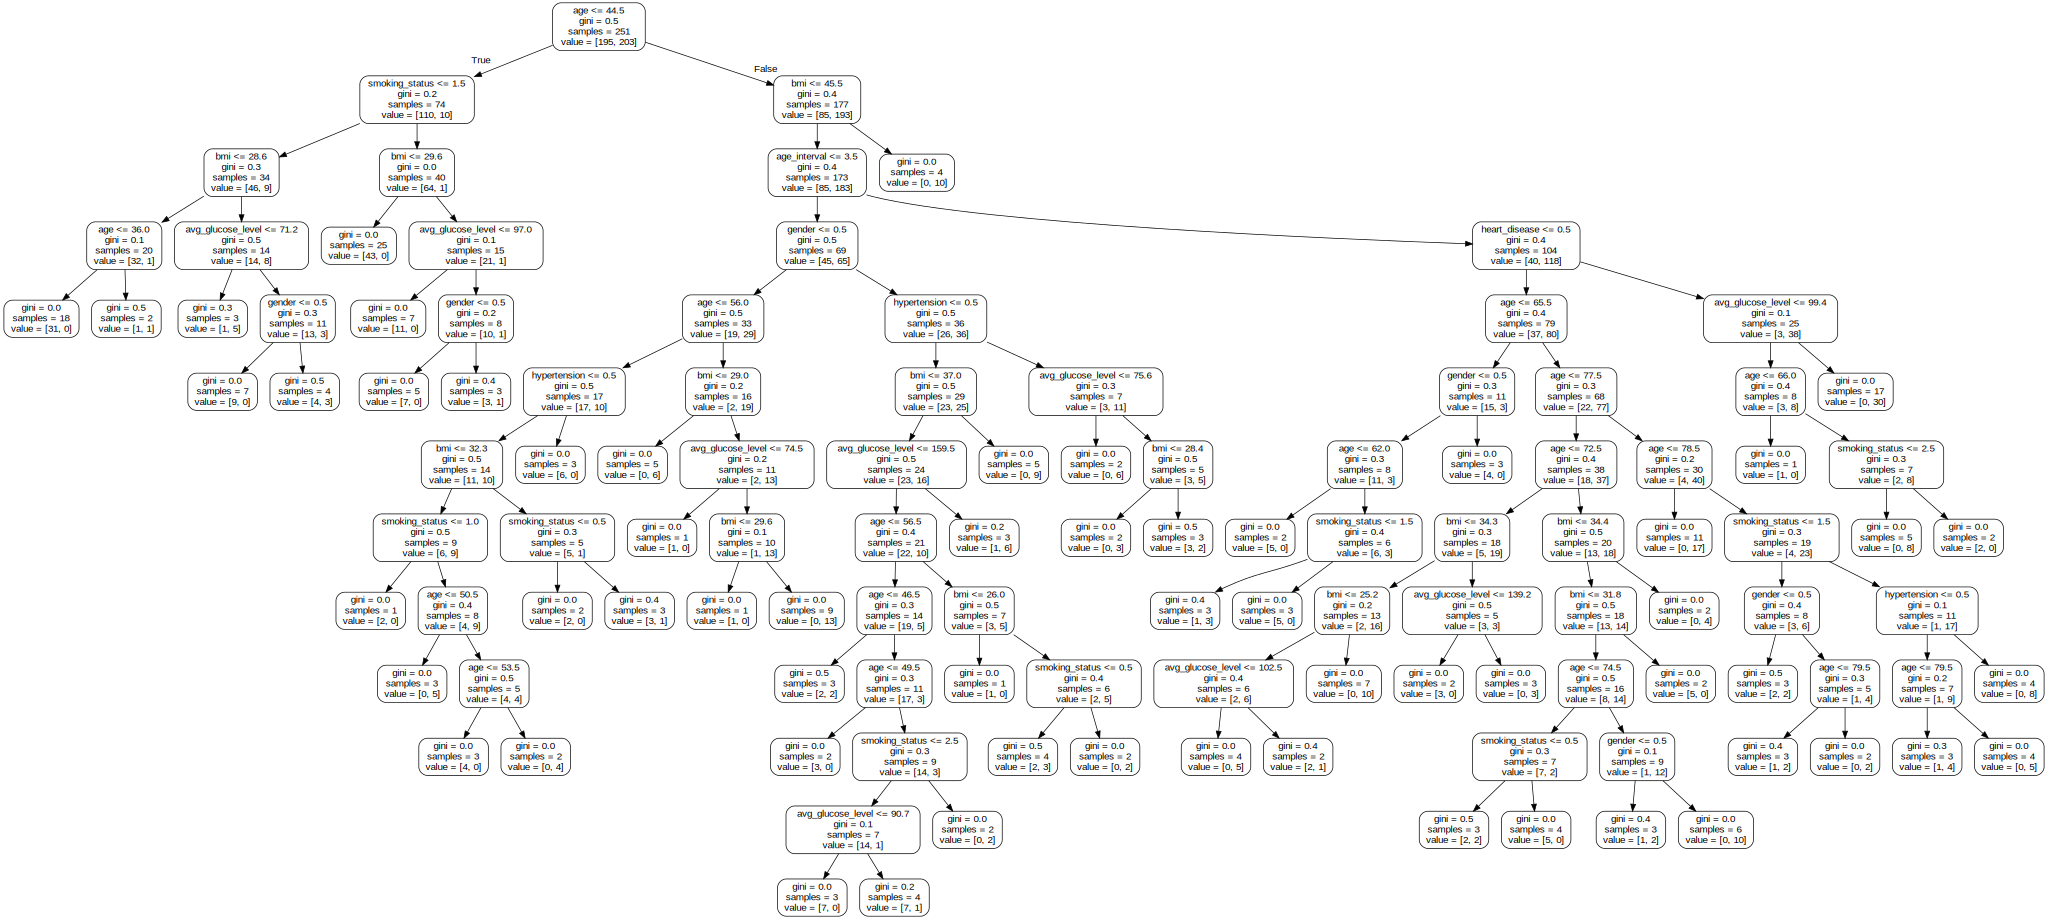

In [ ]:
#@title Default title text
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import graphviz 
import pydot# Pull out one tree from the forest
tree = rdf.estimators_[4]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rdf.estimators_[4]
# Export the image to a dot file
dot_data=export_graphviz(tree, out_file =None, feature_names = columns, rounded = True, precision = 1)# Use dot file to create a graph

graph = graphviz.Source(dot_data)

graph


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1)

tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
scores = accuracy_score(y_test, y_pred)
scores

0.76

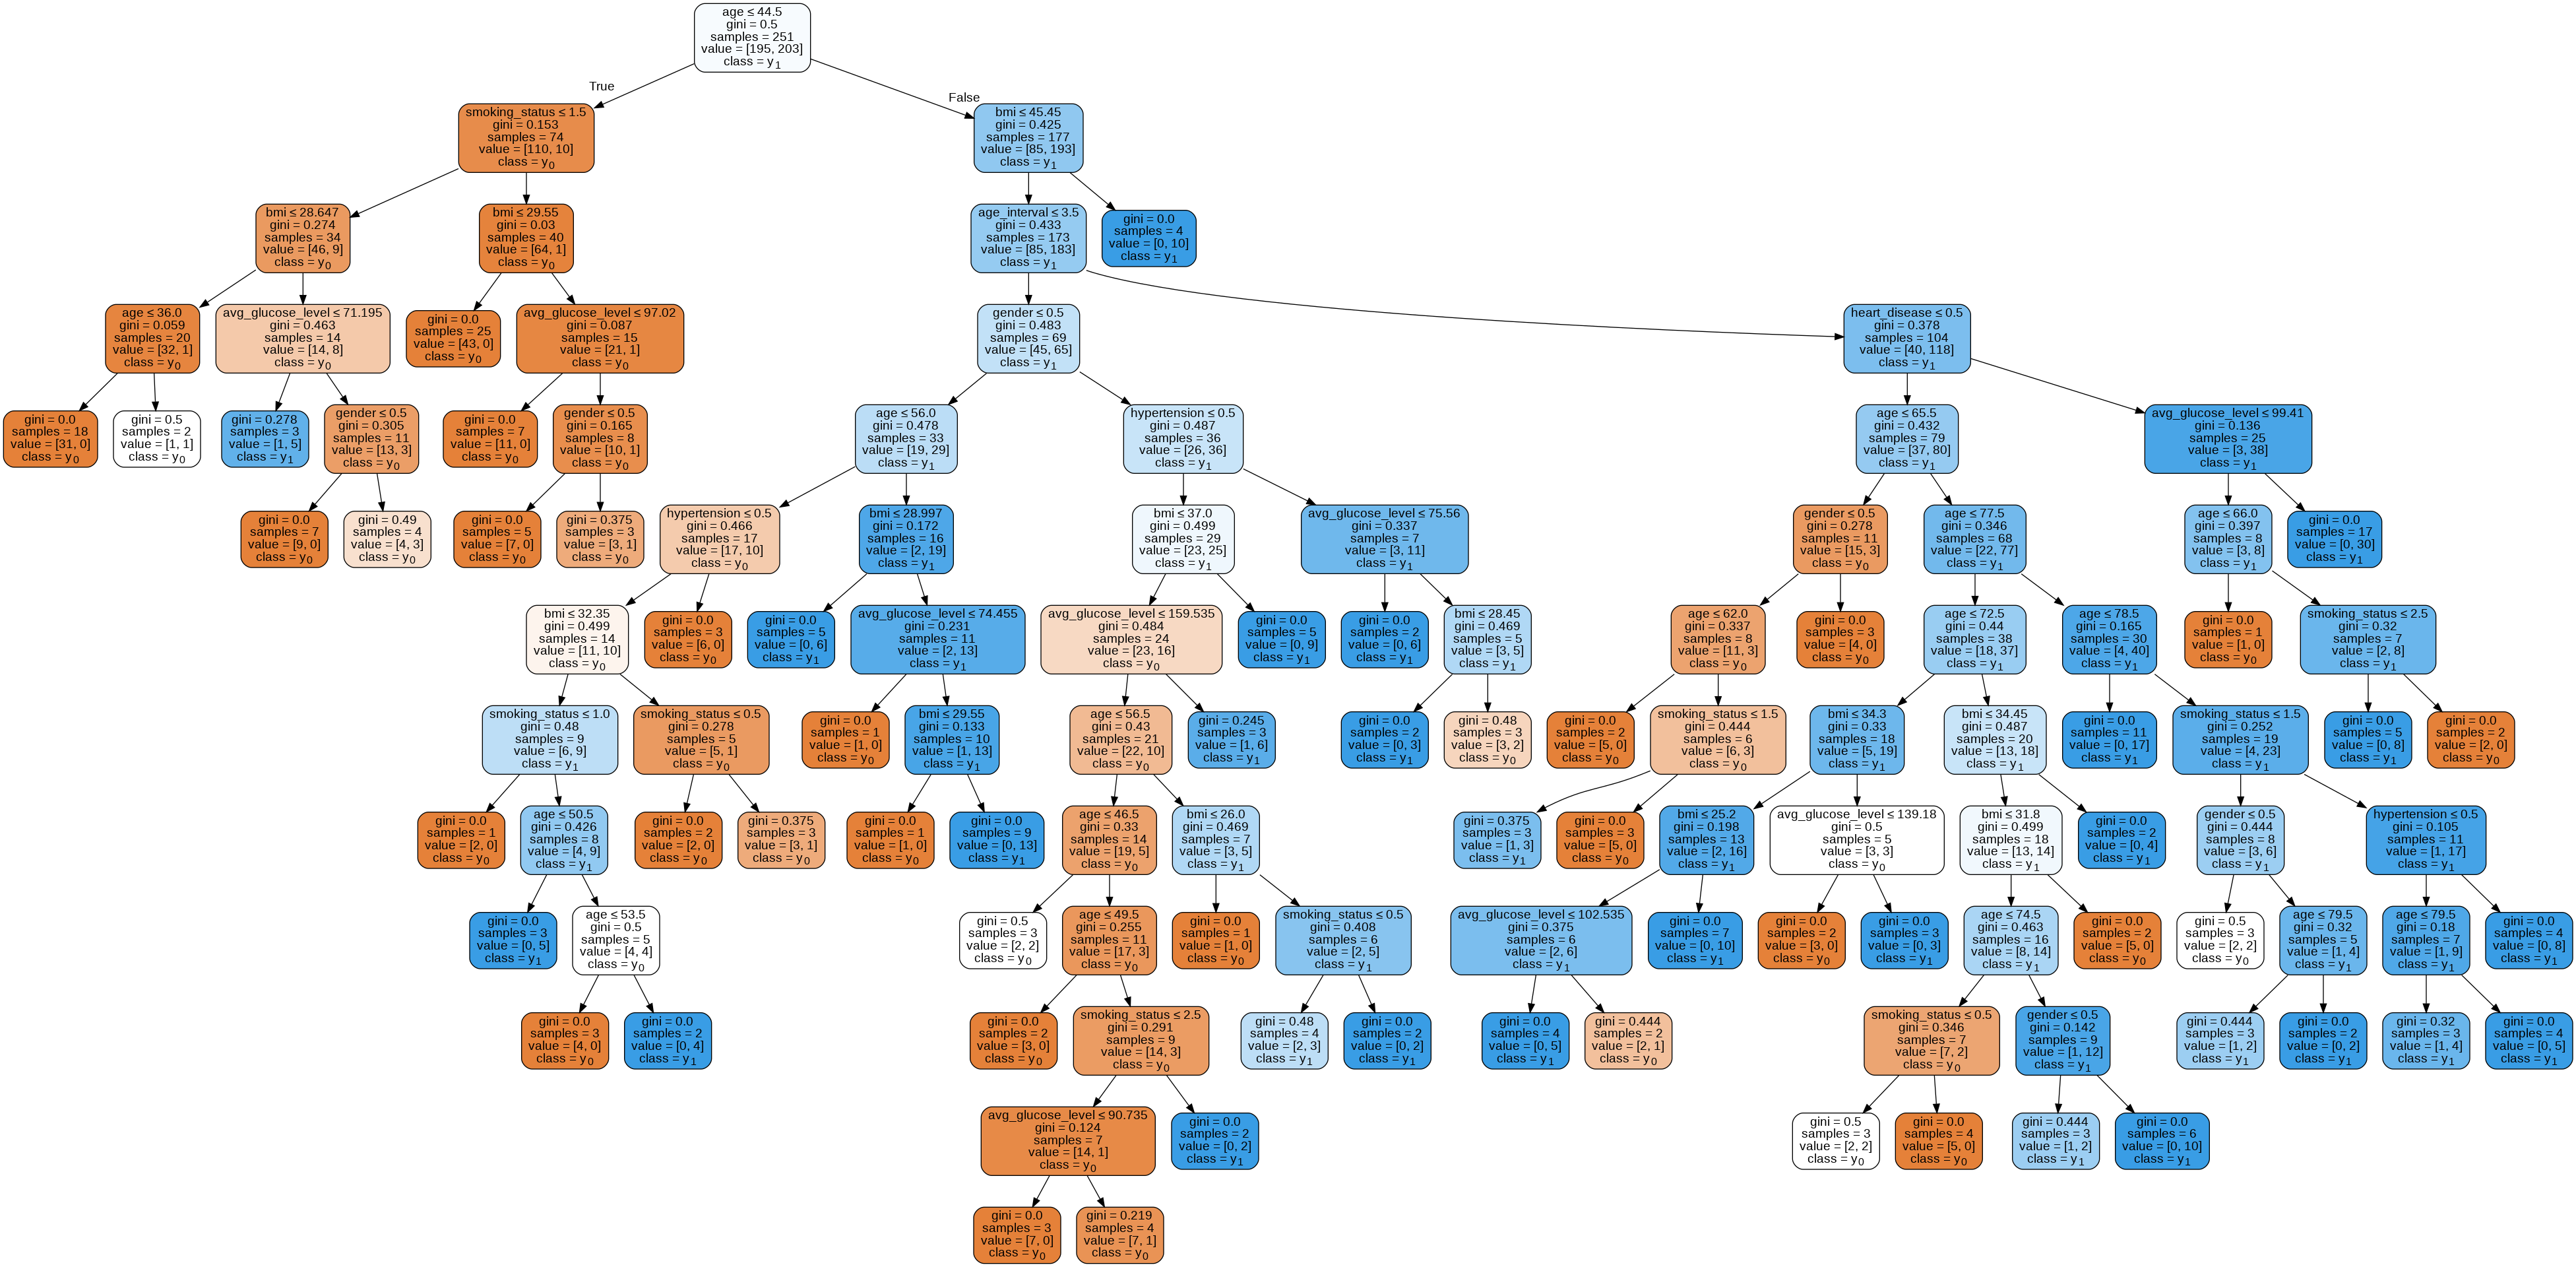

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = columns,class_names=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Strokedetect.png')
Image(graph.create_png())

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66642 sha256=330fe41077fe877131a8170a6ae29af140c66043a9392a1ca701f8f40d123836
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


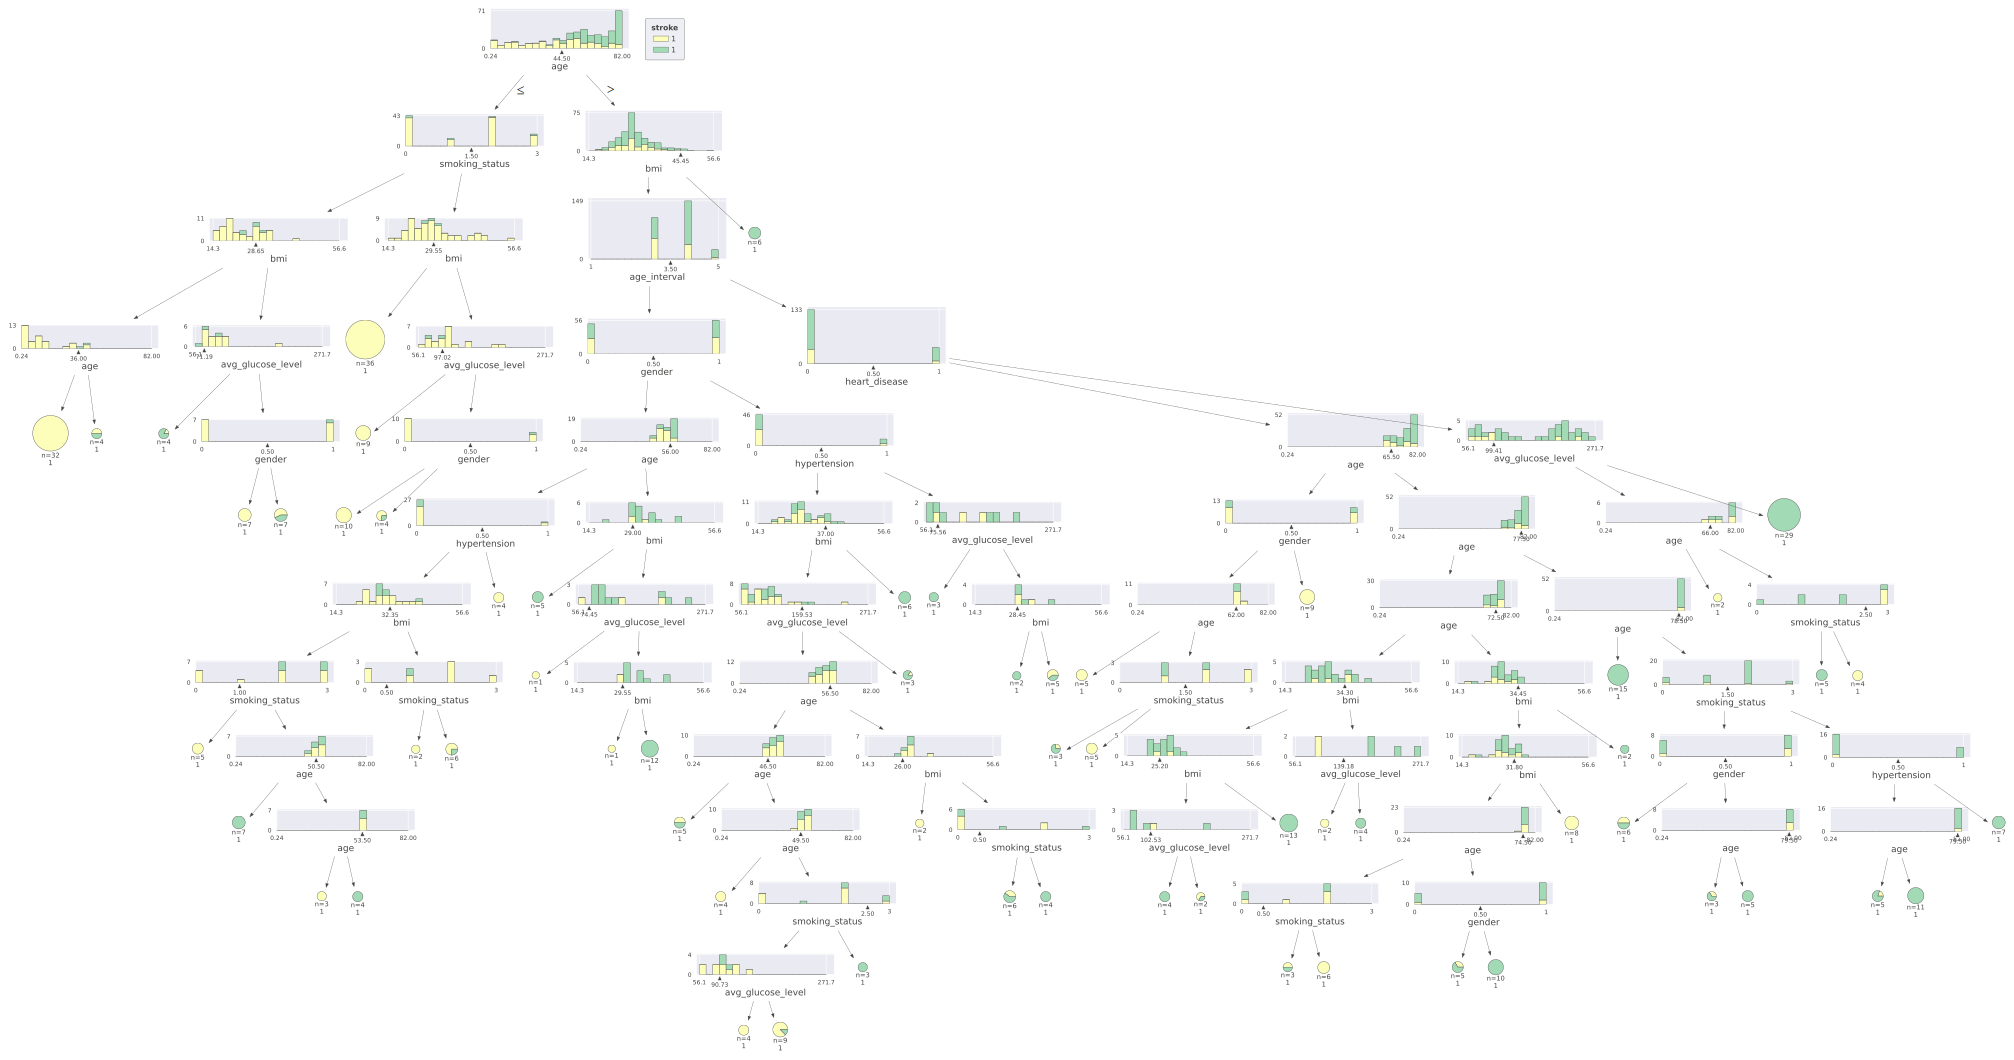

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree, x_train, y_train, target_name="stroke", feature_names=columns, class_names=list(raw_data.stroke))

viz

**COMPARISON**

In [ ]:

from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    

ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]




In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

MLA Name  MLA Train Accuracy  ...  MLA Recall   MLA AUC
14                          SVC              0.7563  ...    0.941176  0.919568
15                        NuSVC              0.7814  ...    0.941176  0.909364
6          LogisticRegressionCV              0.7688  ...    0.941176  0.909364
8             RidgeClassifierCV              0.7739  ...    0.941176  0.909364
0            AdaBoostClassifier              0.8166  ...    0.960784  0.898760
12                   GaussianNB              0.7387  ...    0.921569  0.899560
4        RandomForestClassifier              1.0000  ...    0.941176  0.868547
3    GradientBoostingClassifier              0.9497  ...    0.882353  0.839136
2          ExtraTreesClassifier              1.0000  ...    0.901961  0.818327
1             BaggingClassifier              0.9849  ...    0.862745  0.808924
13         KNeighborsClassifier              0.8467  ...    0.823529  0.799520
17       DecisionTreeClassifier              1.0000  ...    0.764706  0.780312
10                   Perceptron              0.6985  ...    0.607843  0.783513
5     GaussianProcessClassifier              0.9975  ...    0.705882  0.720288
11                  BernoulliNB              0.6407  ...    0.411765  0.675270
16                    LinearSVC              0.5553  ...    1.000000  0.581633
9                 SGDClassifier              0.5302  ...    0.980392  0.541216
7   PassiveAggressiveClassifier              0.5025  ...    0.000000  0.500000

[18 rows x 6 columns]

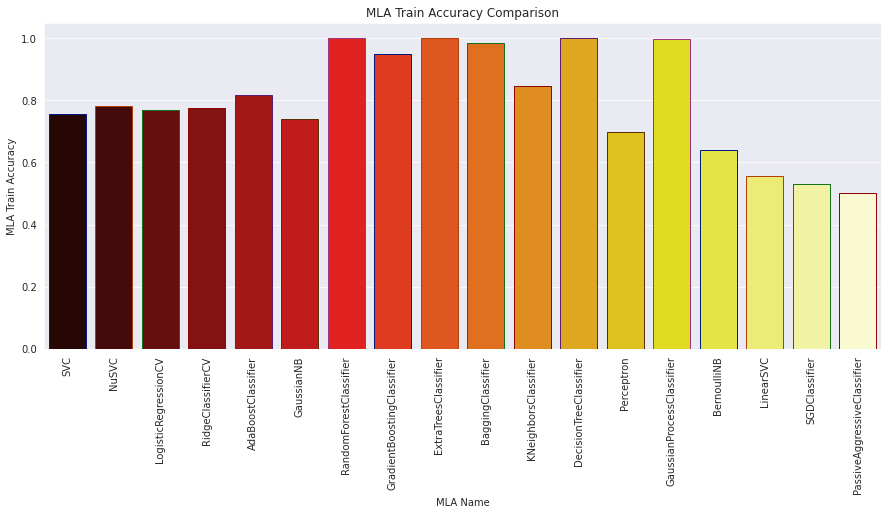

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

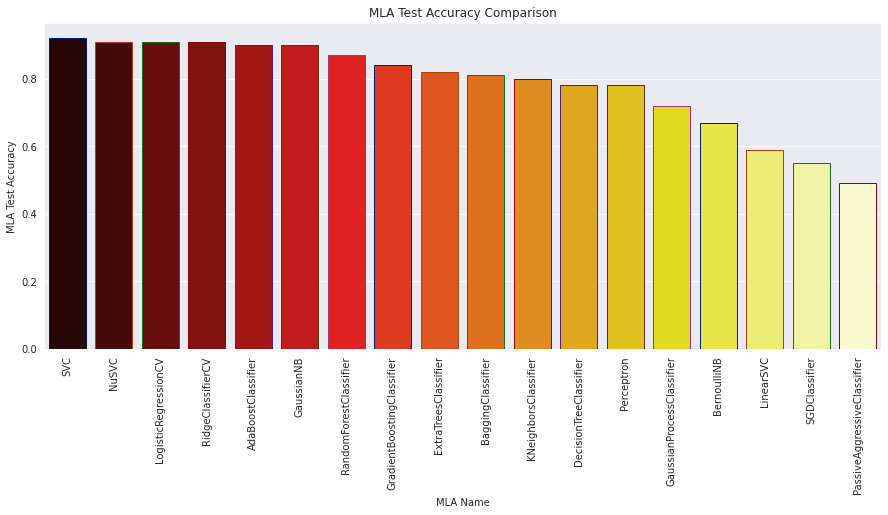

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

**BI Descision:**

From the various algorithms applied on the dataset and through its visualization we attain certain conclusive information on what factors affect the patients having stroke.It is shown that SVM has the highest accuracy rate with 92% followed by LOGISTIC REGRESSION with 87% and RANDOM FOREST with 86%. 
The most decisive factor that affects the person having stroke was concluded to be the age of a person which is shown in decision tree.Outcomes are poorer in patients with stroke with age greater than 44.5.The second biggest factor was concluded to be the person's smoking status and bmi.There is other factor such as glucose level that affect the people suffering from stroke or are more likely to get stroke. Thus,the information gathered is quite conclusive for a people suffering from stroke and preccautionary measures to be taken to avoid stroke.